In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 +np.random.rand(100,1)

## quadratic equation

Text(0, 0.5, 'y dataset')

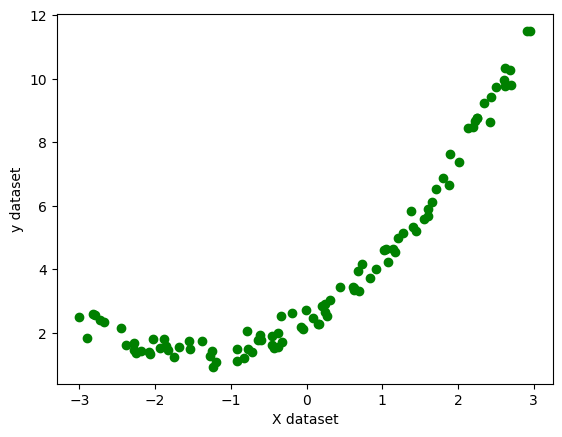

In [6]:
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('y dataset')

In [7]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
## let's implement simple linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


In [9]:
lin_reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,lin_reg.predict(X_test))

In [11]:
score

0.7816407640464677

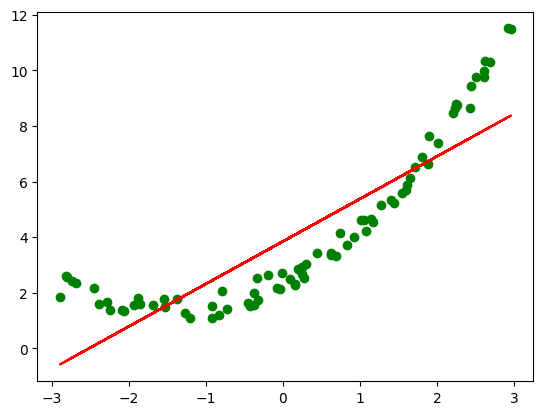

In [14]:
## let's visualize
plt.plot(X_train,lin_reg.predict(X_train),color='r',label='Linear Regression')
plt.scatter(X_train,y_train,color='g',label='Training Data')
# plt.xlabel('X dataset')
# plt.ylabel('y dataset')

In [19]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [20]:
X_train_poly
# 1 , x1, x1^2

array([[ 1.00000000e+00,  2.41609483e-01,  5.83751422e-02],
       [ 1.00000000e+00,  1.65228254e+00,  2.73003758e+00],
       [ 1.00000000e+00, -1.93310707e+00,  3.73690296e+00],
       [ 1.00000000e+00,  2.61508499e+00,  6.83866948e+00],
       [ 1.00000000e+00,  2.91438284e+00,  8.49362731e+00],
       [ 1.00000000e+00,  2.50312311e+00,  6.26562530e+00],
       [ 1.00000000e+00, -2.81782561e+00,  7.94014118e+00],
       [ 1.00000000e+00,  1.01722484e+00,  1.03474637e+00],
       [ 1.00000000e+00, -1.54868282e+00,  2.39841847e+00],
       [ 1.00000000e+00, -4.23183672e-02,  1.79084420e-03],
       [ 1.00000000e+00, -4.57291519e-01,  2.09115533e-01],
       [ 1.00000000e+00,  1.71214709e+00,  2.93144764e+00],
       [ 1.00000000e+00, -2.38312590e+00,  5.67928904e+00],
       [ 1.00000000e+00, -1.97463540e-01,  3.89918496e-02],
       [ 1.00000000e+00,  1.27049607e+00,  1.61416027e+00],
       [ 1.00000000e+00, -4.27043589e-01,  1.82366227e-01],
       [ 1.00000000e+00,  6.28966283e-01

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_predict = regression.predict(X_test_poly)
score = r2_score(y_test,y_predict)
print(score)

0.9894726113275618


In [25]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.4949372  0.54699547]]
[2.32567558]


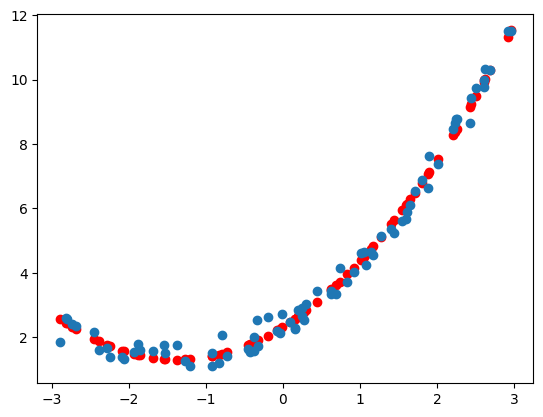

In [31]:
plt.scatter(X_train,regression.predict(X_train_poly),color='r',label='Training Data') # best fit line
plt.scatter(X_train,y_train)

In [38]:
# prediction for new data
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly.transform(X_new)


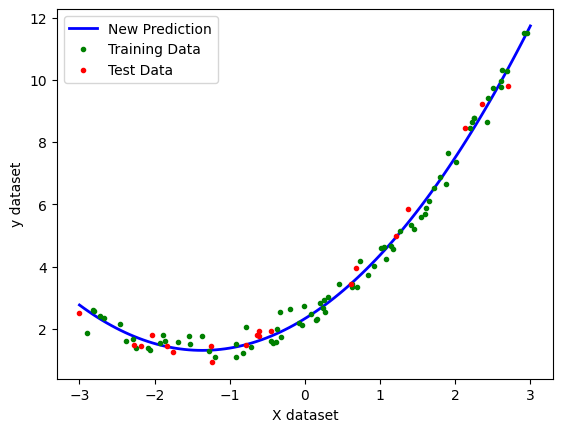

In [39]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new,y_new,color='b',linewidth=2,label='New Prediction')
plt.plot(X_train,y_train,'g.',label='Training Data')
plt.plot(X_test,y_test,'r.',label='Test Data')
plt.xlabel('X dataset')
plt.ylabel('y dataset')
plt.legend()
plt.show()

In [36]:
print(score)

0.9894726113275618


In [ ]:
#  pipeline for degree
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    #  generating data for testing
    X_new = np.linspace(-3,3,100).reshape(100,1) 

    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg = LinearRegression()
    poly_regression=Pipeline([
        ('poly', poly_features),
        ('lin_reg', lin_reg)
    ])

    poly_regression.fit(X_train,y_train)
    y_new = poly_regression.predict(X_new)
    plt.plot(X_new,y_new,color='b',linewidth=2,label='New Prediction')
    plt.plot(X_train,y_train,'g.',label='Training Data')
    plt.plot(X_test,y_test,'r.',label='Test Data')
    plt.xlabel('X dataset')
    plt.ylabel('y dataset')
    plt.show()
    score = r2_score(y_test,poly_regression.predict(X_test))
    print(f"R^2 score for degree {degree}: {score}")


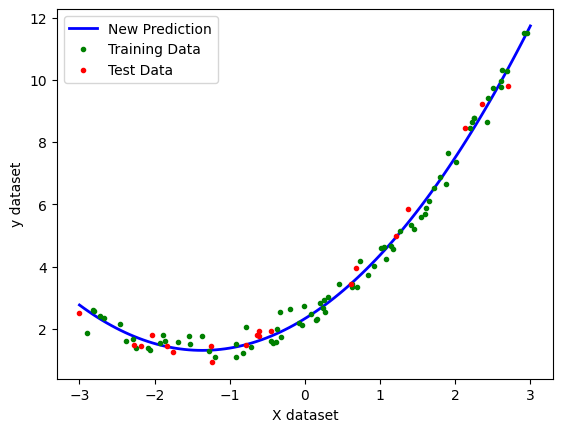

R^2 score for degree 2: 0.9894726113275618


In [50]:
polynomial_regression(2)